Learning the different methods of Machine learning 
Beginning with supervised learning using scikit-learn

Supervised learning

Classification: using sklearn, and iris dataset

In [3]:
# import libraries
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [5]:
# load the dataset 
iris = datasets.load_iris()

In [6]:
# check the type of the dataset
type(iris)

sklearn.utils.Bunch

In [7]:
# as datatype is a bunch whcih is like a dictionary, keys for the data set are printed
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [8]:
# checking type of the data and target 
type(iris.data), type(iris.target)

(numpy.ndarray, numpy.ndarray)

In [9]:
iris.data.shape

(150, 4)

In [11]:
# checking for the target
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [24]:
# Exploratory data analysis (EDA) on the dataset
X = iris.data
Y = iris.target
df = pd.DataFrame(X, Y, columns= iris.feature_names)
df.head()
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
2,6.7,3.0,5.2,2.3
2,6.3,2.5,5.0,1.9
2,6.5,3.0,5.2,2.0
2,6.2,3.4,5.4,2.3
2,5.9,3.0,5.1,1.8


In [32]:
type(X)

numpy.ndarray

array([[<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal width (c

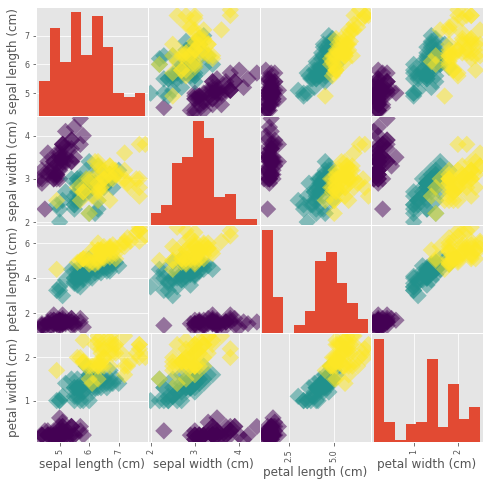

In [13]:
# some plotting to showe the distribution of the data across the different types of flowers
pd.plotting.scatter_matrix(df, c = Y, figsize= [8,8], s= 150, marker = "D")

In [14]:
# seaborn used plotting
import seaborn as sns

In [27]:
#scatter plot in grid for graphical EDA of the dataset, just a different method of plotting the same values
# personal preference of the modules, seaborn looks a bit better than matplotlib
iris_sns = sns.load_dataset("iris")

In [30]:
iris_sns.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


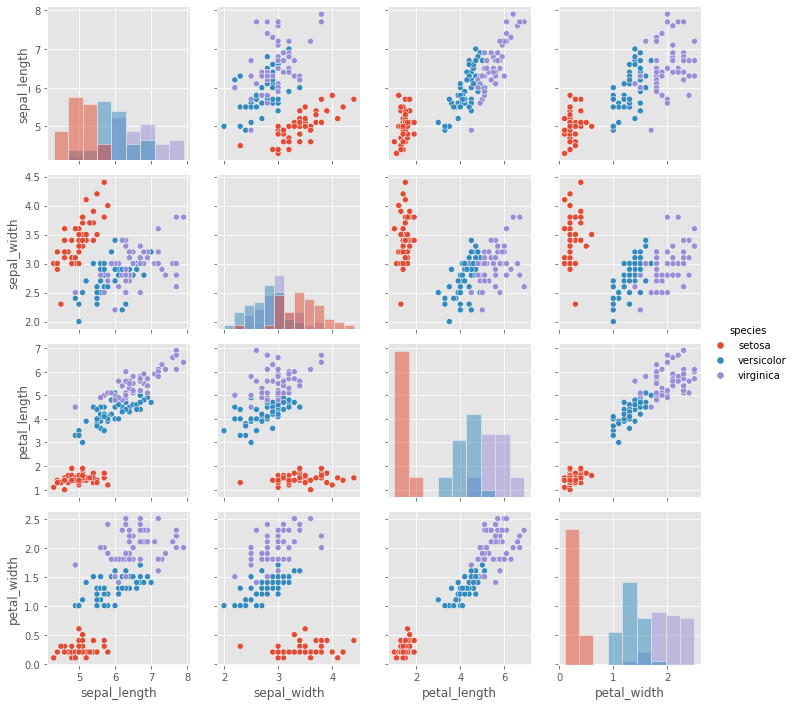

In [29]:
g = sns.PairGrid(iris_sns, hue = "species")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

k Nearest Neighbors

-Predicting the label of a  data point

-Looking at the 'k' nearest labeled data points

-taking a majority vote on the unlabeled value

In [33]:
# create a classifier 
# import the classifier module
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X,Y) # here X and Y are iris.data and iris.target repectively

KNeighborsClassifier(n_neighbors=6)

In [34]:
X.shape

(150, 4)

In [35]:
Y.shape

(150,)

In [38]:
#testing the classifier using an example numpy array
X_new = np.array([[5.6,2.8,3.9,1.1],[5.7,2.6,3.8,1.3],[4.7, 3.2, 1.3, 0.2]])

predict = knn.predict(X_new)
X_new.shape

(3, 4)

In [41]:
# print the prediction of the classifier
print("Prediction: {}".format(predict))

Prediction: [1 1 0]


Once the classifier is done the next step is creating a preformance metric

Here is where the train_test_split comes into play

In [49]:
# performace of the classifier metric 
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 21, stratify = Y)
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
print("Test Set predictions:\n {}".format(Y_pred))

Test Set predictions:
 [2 1 2 2 1 0 1 0 0 1 0 2 0 2 2 0 0 0 1 0 2 2 2 0 1 1 1 0 0 1 2 2 0 0 1 2 2
 1 1 2 1 1 0 2 1]


In [50]:
# checking the accuracy of the model used
knn.score(X_test, Y_test)

0.9555555555555556

Prediction for k =1 : [2 2 2 2 1 0 1 0 0 1 0 2 0 2 2 0 0 0 1 0 2 2 2 0 1 1 1 0 0 1 2 2 0 0 1 2 2
 1 1 2 1 1 0 2 1]

Prediction for k =2 : [2 1 2 2 1 0 1 0 0 1 0 2 0 2 2 0 0 0 1 0 2 2 2 0 1 1 1 0 0 1 2 2 0 0 1 2 2
 1 1 2 1 1 0 2 1]

Prediction for k =3 : [2 2 2 2 1 0 1 0 0 1 0 2 0 2 2 0 0 0 1 0 2 2 2 0 1 1 1 0 0 1 2 2 0 0 1 2 2
 1 1 2 1 1 0 2 1]

Prediction for k =4 : [2 2 2 2 1 0 1 0 0 1 0 2 0 2 2 0 0 0 1 0 2 2 2 0 1 1 1 0 0 1 2 2 0 0 1 2 2
 1 1 2 1 1 0 2 1]

Prediction for k =5 : [2 2 2 2 1 0 1 0 0 1 0 2 0 2 2 0 0 0 1 0 2 2 2 0 1 1 1 0 0 1 2 2 0 0 1 2 2
 1 1 2 1 1 0 2 1]

Prediction for k =6 : [2 1 2 2 1 0 1 0 0 1 0 2 0 2 2 0 0 0 1 0 2 2 2 0 1 1 1 0 0 1 2 2 0 0 1 2 2
 1 1 2 1 1 0 2 1]

Prediction for k =7 : [2 1 2 2 1 0 1 0 0 1 0 2 0 2 2 0 0 0 1 0 2 2 2 0 1 1 1 0 0 1 2 2 0 0 1 2 2
 1 1 2 1 1 0 2 1]

Prediction for k =8 : [2 1 2 2 1 0 1 0 0 1 0 2 0 2 2 0 0 0 1 0 2 2 2 0 1 1 1 0 0 1 2 2 0 0 1 2 2
 1 1 2 1 1 0 2 1]

Prediction for k =9 : [2 2 2 2 1 0 1 0 0 1 0 2 0 2 2 0 0 0 1 0 2 2 2 0 1

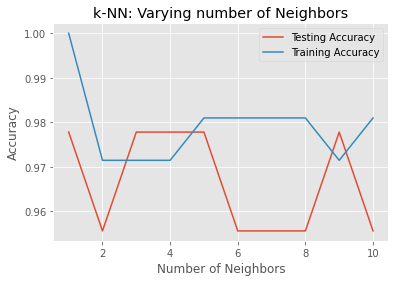

In [57]:
# creating a model complexity curve

#arrays to store the train and test accuracies
neighbors =np.arange(1, 11)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# data split for the test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 21, stratify = Y)

# loop over different values of k
for i,k in enumerate(neighbors):
    # classifier which is being looped over multiple values
    knn = KNeighborsClassifier(k)

    # fitting the classifier
    knn.fit(X_train, Y_train)

    #testing the prediction for different values of k
    Y_pred = knn.predict(X_test)
    print("Prediction for k ={} : {}\n".format(k, Y_pred))

    #accuracy of training set
    train_accuracy[i] = knn.score(X_train, Y_train)

    #accuracy on test set
    test_accuracy[i] = knn.score(X_test, Y_test)

# plotting the model complexity curve
plt.title("k-NN: Varying number of Neighbors")

# seaborn used for plotting
sns.lineplot(x = neighbors, y = test_accuracy, label = "Testing Accuracy")
sns.lineplot(x = neighbors, y = train_accuracy, label = "Training Accuracy")

'''
matplotlib code for plotting the same as bove

plt.plot(neighbors, test_accuracy, label = "Testing Accuracy")
plt.plot(neighbors, train_accuracy, label = "Training Accuracy")
'''

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

Regression

Similar to kNN but is used where the target is continious values like price, gdp etc.

In [59]:
'''
dataset used here is boston housing data
here we use the dataset from the scikit learn module
'''

boston = datasets.load_boston()
type(boston)

sklearn.utils.Bunch

In [60]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [89]:
X = boston.data
Y = boston.target
df1 = pd.DataFrame(X, columns = boston.feature_names)
df2 = pd.DataFrame(Y, columns=["MEDV"])

In [90]:
boston_df = pd.concat([df1, df2], axis = 1)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [93]:
X_rooms = X[:,5]
type(X_rooms), type(Y)

(numpy.ndarray, numpy.ndarray)

In [107]:
Y = Y.reshape(-1,1)
X_rooms = X_rooms.reshape(-1,1)
type(X_rooms), type(Y)

(numpy.ndarray, numpy.ndarray)

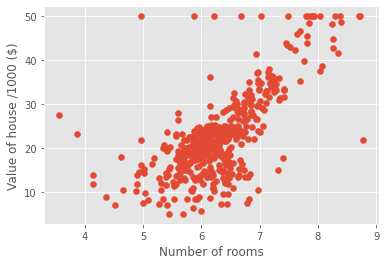

In [96]:
plt.scatter(X_rooms, Y)
plt.xlabel("Number of rooms")
plt.ylabel("Value of house /1000 ($)")
plt.show()

In [97]:
# applying a regression model
# linear regression model is applied
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_rooms, Y)

# checking the prediction of the regressor over the range of the data
prediction_space = np.linspace(min(X_rooms), max(X_rooms)).reshape(-1,1)

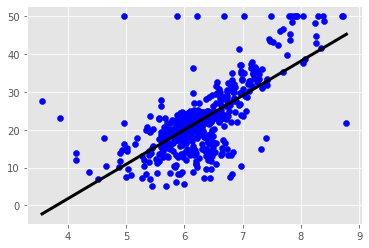

In [102]:
# plotting the regression model for the selected data, which is the rooms data
plt.scatter(X_rooms, Y, color = "blue")
plt.plot(prediction_space, reg.predict(prediction_space), color = "black", linewidth = 3)
plt.show()

<AxesSubplot:>

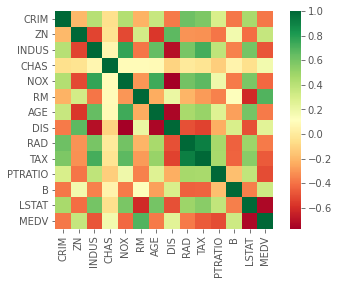

In [115]:
sns.heatmap(boston_df.corr(), square= True, cmap = "RdYlGn")

In [118]:
# regression model through all the datas in the booston data set
# calculate the root mean squared erros (RMSE)
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)
reg_all.score(X_test, y_test)

0.7112260057484908

In [121]:
#root mean squared error of the regression model
np.sqrt(mean_squared_error(y_test, y_pred))

4.63868992617284

Cross validation 

split the data in the differnt folds and fit the model over it and figure out the metric with one fold as the training set and the rest of the folds as the test set

the training set is changes over the course of the validation process until all the folds have been used as the training set

the metrics which are calculated in each iteration can be used to find the mean and get a working output for the data

In [124]:
# cross validattion import
from sklearn.model_selection import cross_val_score
reg = LinearRegression()
cv_results = cross_val_score(reg, X, Y, cv = 5)
print("cross val scores across selected number of folds: {}".format(cv_results))
print("mean of the cross val scores: {}".format(np.mean(cv_results)))

cross val scores across selected number of folds: [ 0.63919994  0.71386698  0.58702344  0.07923081 -0.25294154]
mean of the cross val scores: 0.35327592439588124


Ridge Regression

Using the similar methods as in linear regression, usefull for values with high complexity

Form of regularized regression which adds value with the OLS

In [125]:
# Ridge Regression, same as before only changes is in the model
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.3, random_state= 42)

ridge = Ridge(alpha = 0.1, normalize = True) 
# alpha set here, normalize is set as true will keep all variables in same scale

ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge.score(X_test, y_test)

0.6996938275127313

Lasso Regression

Almost same as Ridge only exception being the loss function

Ridge uses squares of the coefficients, Lasso uses the absolute value

In [126]:
#Lasso Regression
from sklearn.linear_model import Lasso
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.3, random_state= 42)

lasso = Lasso(alpha = 0.1, normalize = True) 
# alpha set here, normalize is set as true will keep all variables in same scale

lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso.score(X_test, y_test)

0.595022953532855

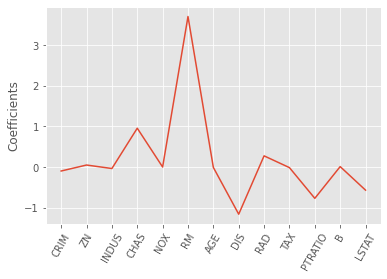

In [129]:
# feature selection using lasso
names = boston.feature_names
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X,Y).coef_
plt.plot(range(len(names)), lasso_coef)
plt.xticks(range(len(names)), names, rotation = 60)
plt.ylabel("Coefficients")
plt.show()

In [133]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

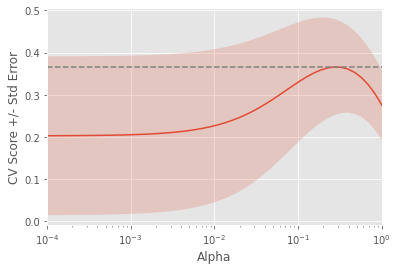

In [136]:
# how to select the alpha values and how it impacts the regression 
#setup of the array of alphas and lists to store scores 

alpha_space = np.logspace(-4,0,50)
ridge_scores = []
ridge_score_std = []

# create a ridge regressor
ridge = Ridge(normalize= True)

# compute the score over a range of alpha values
for alpha in alpha_space:
    # specify alpha values to use
    ridge.alpha = alpha

    # perform the 10-fold CV
    ridge_cv_scores = cross_val_score(ridge, X, Y, cv = 10)

    # append mean of CV scores to ridge.scores
    ridge_scores.append(np.mean(ridge_cv_scores))

    #append std of reidge-scores_cv to ridge_scores_std
    ridge_score_std.append(np.std(ridge_cv_scores))

display_plot(ridge_scores, ridge_score_std)

